<center><font size="+4">Programming and Data Analytics 1 2021/2022</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 5: Functions</font></center>
<center><font size="+2"> With applications to</font></center>
<center><font size="+2"> Analysis of SIR models data and Creation of word clouds for COVID-related online news</font></center>

---

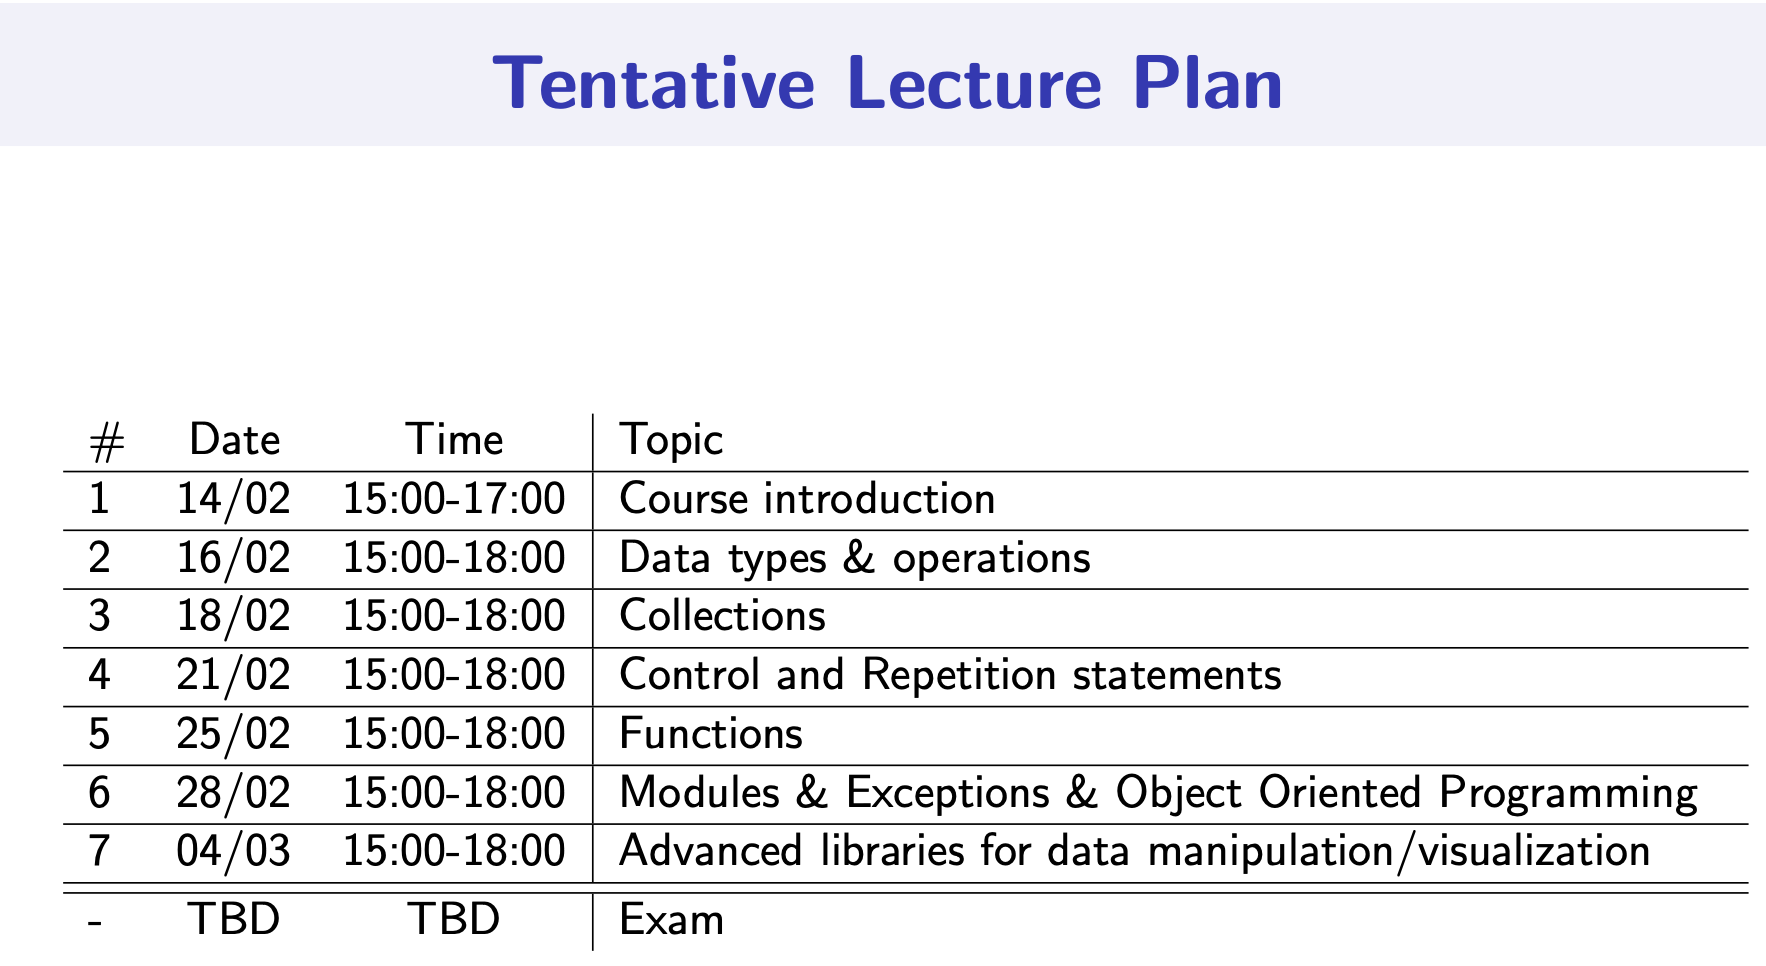

In [12]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/tentativeLecturePlan.png',width=700)
display(img)

<center><font size="+4">Lecture Plan</font></center>

| Class | Date | Time | Topic |
|:----------:|-----------------------------|--|--|
|1| 14/02 | 15:00-17:00 | Course introduction |
|2| 16/02 | 15:00-18:00 | Data types & operations |
|3| 18/02 | 15:00-18:00 | Collections & First taste of plots |
|4| 21/02 | 15:00-18:00 | Control statements (if, loops) & CSV manipulation/visualization on COVID-19 data | 
|5| 25/02 | 15:00-18:00 | Functions & Applications to analysis of epidemiological models & to Generation of WordClouds from online news |
|6| 28/02 | 15:00-18:00 | Modules & Exceptions & OOP & Applications to betting markets (ABM models) |
|7| 04/03 | 15:00-18:00 | Advanced libraries for data manipulation (NumPy, Pandas) & Application to COVID-19 and Finance data |

> Note: we created this table using Markdown. <br/>
> [There are also online table generators](https://www.tablesgenerator.com/markdown_tables)

<font size="+2"> How good are we so far - Kahoot quiz on previous class </font>
* Using your phone or a different display go to [https://kahoot.it/](https://kahoot.it/)
* Type the given PIN

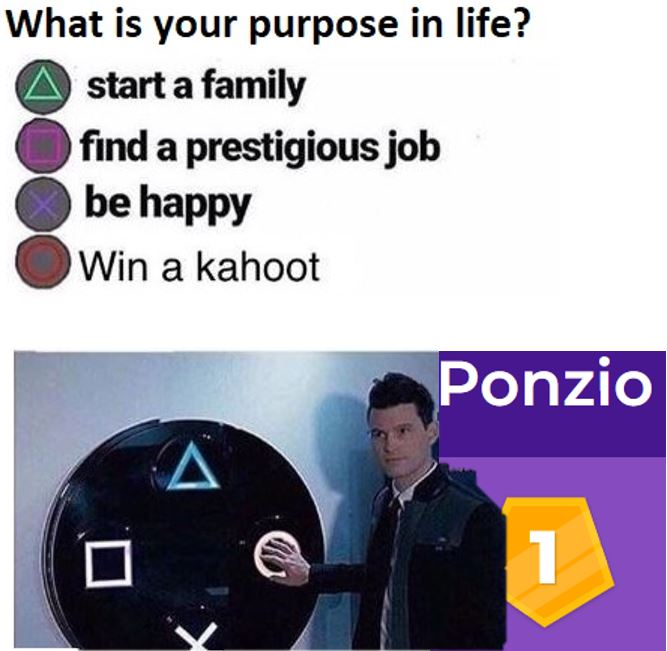

In [3]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/kahootps.jpeg',width=400)
display(img)

In [4]:
from IPython.display import IFrame
IFrame("https://kahoot.it/", 500, 400)

---

# Intro: copy-pasting is not a good idea when programming

**_How to get readable and maintainable code by avoiding spaghetti code_**

Let's sum up the first `n` naturals:

In [5]:
sum1 = 0

n = int(input('Give me n'))
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)    

Give me n 4


The sum of the first 4 naturals [1, 2, 3, 4] is 10


## Classic copy-paste errors

What if we want to do this several times in different parts of a program?
* A bugged version due to __classic copy-paste errors__

In [2]:
#BUGGED VERSION DUE TO CLASSIC COPY-PASTE ERRORS
sum1 = 0

n = int(input('Give me n'))
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)


# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...


n2 = int(input('Give me n2'))
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)

Give me n 3


The sum of the first 3 naturals [1, 2, 3] is 6


Give me n2 4


The sum of the first 3 naturals [1, 2, 3] is 12


In [7]:
#FIXED VERSION
sum1 = 0

n = int(input())
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)


# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...


sum1=0
n2 = int(input())
rng = range(1,n2+1)
for i in rng:
    sum1+=i
print('The sum of the first',n2,'naturals',list(rng),'is',sum1)

 3


The sum of the first 3 naturals [1, 2, 3] is 6


 3


The sum of the first 3 naturals [1, 2, 3] is 6


Imagine doing this in a file with __thousands lines__ of code and __several copies__ of the same code
* It would be very error-prone!

Luckily, we can wrap this computation in __a function__
* __Defined__ (written) once
* __Invoked__ (used, called) many times

In [3]:
def sum_naturals(n):
    sum1 = 0
    rng = range(1,n+1)
    for i in rng:
        sum1+=i
    print('The sum of the first',n,'naturals',list(rng),'is',sum1)
    return sum1

sum3 = sum_naturals(3)
sum4 = sum_naturals(4)
print('Twice the sum of the first 4 naturals:',sum4*2)

The sum of the first 3 naturals [1, 2, 3] is 6
The sum of the first 4 naturals [1, 2, 3, 4] is 10
Twice the sum of the first 4 naturals: 20


In [1]:
sum_naturals(int(input()))
sum_naturals(int(input()))

NameError: name 'sum_naturals' is not defined

## Functions increase Modularity and Manutenability

What if we want to update a function?
* Maybe you know that 
   - $\sum\limits_{i=1}^{n} i = \frac{n\cdot (n+1)}{2}$
   - look, e.g., [here](https://en.wikipedia.org/wiki/1_%2B_2_%2B_3_%2B_4_%2B_%E2%8B%AF)
* Above we can just __modify the function once__, and all the rest of the code will become aware of the change 
  * By magic! ;)  

In [5]:
def sum_naturals(n):
    sum1 = int(n*(n+1)/2)
    print('The sum of the first',n,'naturals is',sum1)
    return sum1

# What is a function?

[Functions](https://www.w3schools.com/python/python_functions.asp) (in certain cases called procedures) are a key notion in programming
* Enable the **procedural programming style** mentioned in the first lecture
  * Break down a big problem into smaller ones
  * Decouple 
    * the program logic (what the program does) from 
    * the data (what the program manipulates)
  * Therefore increase important properties of programs
    - __readability__ 
    - __maintainability__
    - __extensibility__

A function consists of a sequence of statements (or instructions) that 
* have been collected together 
* have been given a name

A bit like in mathematics (e.g. $x1= max(x2,x3)$), functions
* might have arguments ($x_2,x_3$, the __arguments__ or __parameters__)
* execute a number of computations based on the arguments (the statements composing its __body__)
* might return a computed value (the __return value__)

But in programming languages functions:
* might have side effects 
* might depend on variables defined elsewhere or in inputs from the user

In [9]:
def non_mathematical_function(y):
    v_in= int(input())
    print('The result for',y,'is',v_in+y)
    
non_mathematical_function(1)
non_mathematical_function(1)
non_mathematical_function(1)

 1


The result for 1 is 2


 10


The result for 1 is 11


 100


The result for 1 is 101


In [8]:
gv=0

def non_mathematical_function1(y):
    print('The result for',y,'is',gv+y)
    
non_mathematical_function1(1)
gv=1
non_mathematical_function1(1)
gv=2
non_mathematical_function1(1)

The result for 1 is 1
The result for 1 is 2
The result for 1 is 3


> Local vs global variable
> - a variable defined insime a function is a __local variable__: it exists only within that function
> - `gv` is a __global variable__ becuase it is not defined in a specific function

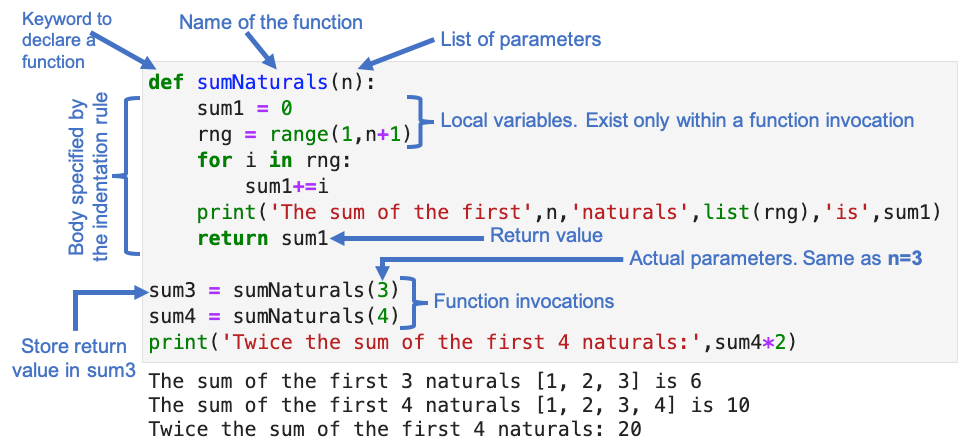

In [11]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/function.png',width=800)
display(img)

__Aspects to consider when writing a function__
* Each function should have a __single purpose__
  * Can you describe what it does with a single verb?
  * If a function has more purposes, consider splitting it 
* Use self-commenting names for function and for arguments
  * Something like `def my_fun(my_arg)` is __not a good idea__
* Do not change mutable arguments (lists, dictionaries, sets) 
  * Unless clearly defined, e.g. in the function name
  * You might have _bad surprises_ when reusing some old code of yours...
* Do not change global variables
  * These _side-effects_ will inevitably give you bugs complex to discover!

# Scope of variables (Global variables vs Local variables)

In [23]:
sum1 = 100

def sumNaturals(n):
    sum1 = 0
    rng = range(1,n+1)
    lv = 3
    for i in rng:
        sum1+=i
    print('The sum of the first',n,'naturals',list(rng),'is',sum1,'(here sum1 is the local variable)')
    return sum1

result = sumNaturals(5)
print('Result contains',result)
print('sum1   contains',sum1,'(note that we refer to the global variables in the first line of this cell)')
#print(lv) #This gives an error

The sum of the first 5 naturals [1, 2, 3, 4, 5] is 15 (here sum1 is the local variable)
Result contains 15
sum1   contains 100 (note that we refer to the global variables in the first line of this cell)


I just told you that local variables are local to each function invocation
* Therefore we get an error (_NameError: name 'lv' is not defined_)
* But then why can I print `sum1`?
* And why do I get a number different than `15`?

> Because I am printing another variable named `sum1`, a __global variable__, that we have declared before the function

## Global variables - Material left for reference. We skip this in class

A __global variable__ does not belong to any function and exists across all code.
* But cannot be used in functions that define a new variable with same name
* Everytime we invoke `sumNaturals` we create a new local variable `sum1` which 
  * _shadows_ the global variable `sum1`
  * ceases to exist when the function terminates, making the global variables accessible again.

In general, __global variables are bad if used in functions__!
* Try to minimise their use in functions
* A function should be a self-contained unit of logic
  * If you really need to reference/modify global variables, try to rethink your code

Python tries to defend us from the problems given by global variables by 
* having a _bizarre behaviour_ when it comes to global variables used in functions:  
  1. If you want to __use__ the value of a global variable, you just use the variable
  2. If you try to __modify__ a global variable, you automatically create a new local variable with same name 
  3. If you really want to modify a global variable `gv` within a function, then you have to prove that you know what you are doing
     * You have to redeclare the global variable `gv` in the function using `global gv`
     * Which means: _hey, I know that gv is a global variable_

In [44]:
gv=0

def use_global_var():
    #No problems in using the value of the global variable gv
    print(gv)

def wrong_modify_global_var():
    #Problems in reading the value of the lobal variable gv
    print(gv)
    #The following statement will create a new local variable named gv which shadows the global variable gv
    #Therefore the print will fail because the local variable gv has not been initialized yet
    gv=10
    
def not_modify_global_var():
    #The following statement will create a new local variable named gv which shadows the global variable gv
    #Therefore the print will fail because the local variable gv has not been initialized yet
    gv=10
    #No problems in using the local variable gv
    print('gv inside not_modify_global_var() is',gv)
    
def correct_modify_global_var():
    #Dear Python, I want to use and modify the global variable gv
    global gv
    #No problems in reading the value of the global variable gv
    print(gv)
    #The following statement will increase by 1 the global variable gv
    gv=gv+1

In [45]:
use_global_var()
gv=gv+1
use_global_var()

0
1


In [46]:
#wrong_modify_global_var() # ERROR

In [47]:
print('gv before not_modify_global_var() is',gv)
not_modify_global_var()
print('gv after  not_modify_global_var() is',gv)

gv before not_modify_global_var() is 1
gv inside not_modify_global_var() is 10
gv after  not_modify_global_var() is 1


In [49]:
correct_modify_global_var()
correct_modify_global_var()
correct_modify_global_var()
correct_modify_global_var()
correct_modify_global_var()
correct_modify_global_var()

4
5
6
7
8
9


## A recap on variables scope

[The scope of a variable refers to the code portions in which you can see/modify a variable](https://matthew-brett.github.io/teaching/global_scope.html)
* A variable defined at the top level of your script (not inside a function), is a __global variable__
  * You can access global variables from anywehere in your script
* A variable defined in a function is local to that function
  * Statements in other functions or in the top level of your script cannot see it

_Any wise programmer would suggest you..._

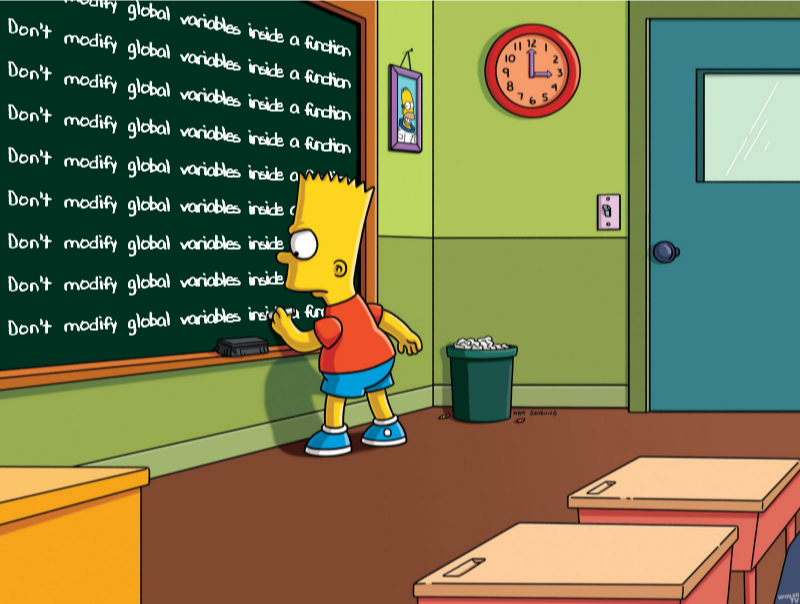

In [13]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/globalVariables2.png',width=600)
display(img)

Generated using [rankey.com](http://www.ranzey.com/generators/bart/index.html)

# Input and output of a function

## Pass by reference

In Python, arguments are passed __by reference__

* For example, if you pass a list `lst` as argument:
  * The function will not use a copy of `lst`, but `lst` itself (we pass its _address_, possibly using a variable with different name)
  * Any modification to the list will be reflected in the code that called the function

Intuitively, you pass a _reference to the list_

> Passing an empty list or a list with 1000 elements has the same cost! <br/>
> You pass just the reference to the _beginning_ of the list

In [14]:
def append_to_list(lst):
    lst.append('added in the function')

mylst = ["first","second"]
print(mylst)
append_to_list(mylst)
print(mylst)

['first', 'second']
['first', 'second', 'added in the function']


What happens if you execute the code below?
* More importantly: __why?__

In [12]:
def append_to_list(lst):
    lst.append('end')
    lst = [1,2]
    print('Inside  the function',lst)

mylst = ["first","second"]
print('Before the function',mylst)
append_to_list(mylst)
print('After the function',mylst)

Before the function ['first', 'second']
Inside  the function [1, 2]
After the function ['first', 'second', 'end']


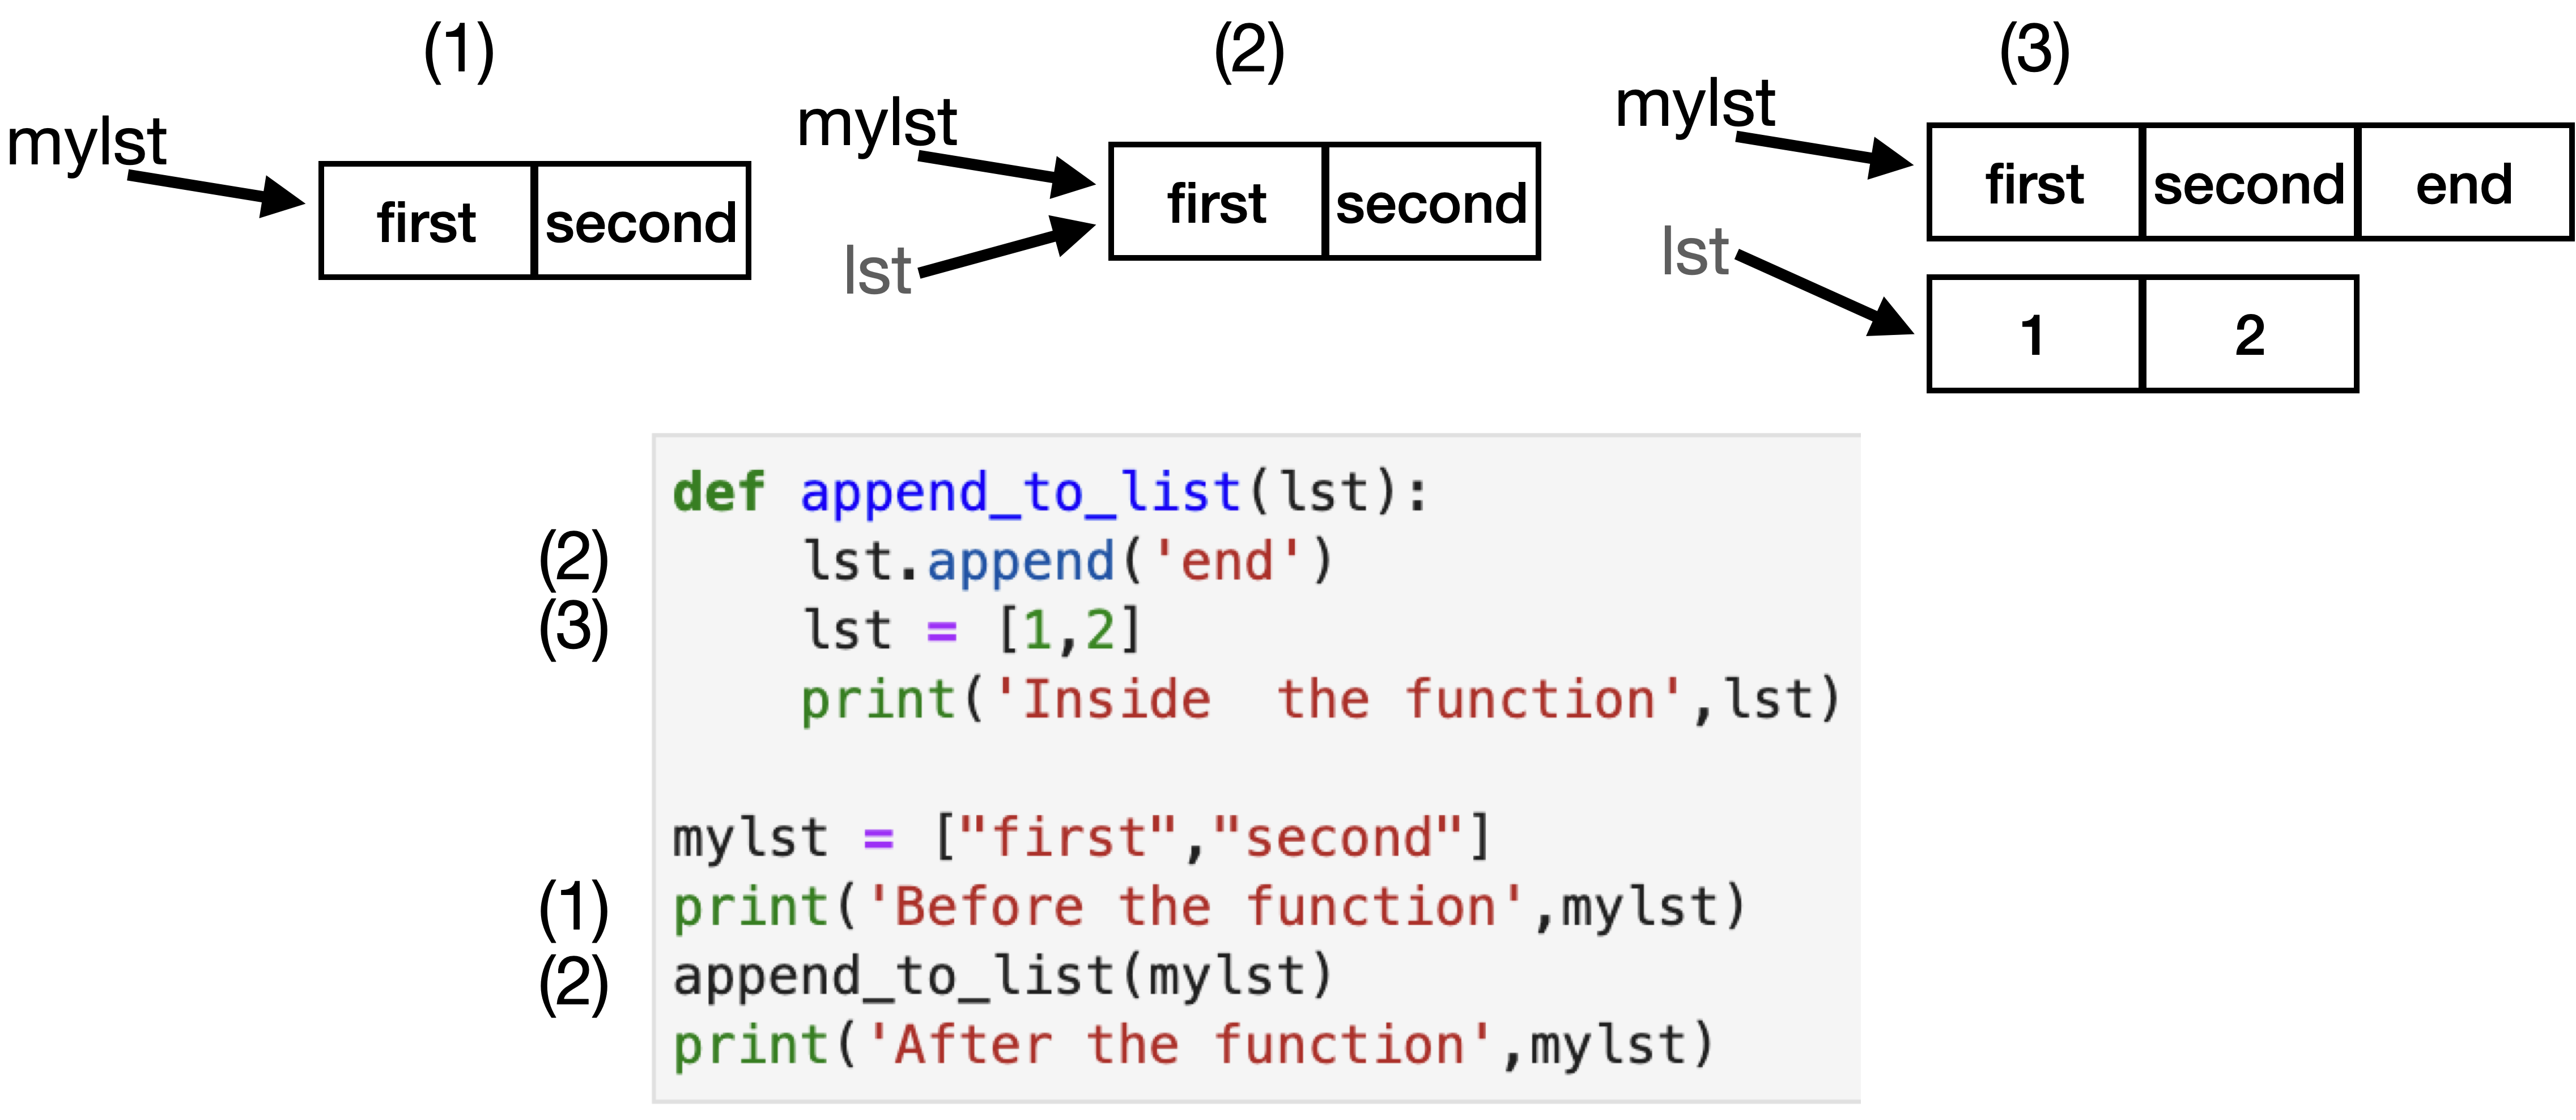

In [6]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/func_params.png',width=800)
display(img)

What if we reassing lst before appending?
- Why?

In [15]:
def append_to_list(lst):
    lst = [1,2]
    lst.append('end')

mylst = ["first","second"]
print('Before the function',mylst)
append_to_list(mylst)
print('After the function',mylst)

Before the function ['first', 'second']
After the function ['first', 'second']


## Arguments can be specified in several ways/with several options

### We can specify arguments by name

In [54]:
def print_names(name1,name2):
    print(name1,name2)

print_names('Andrea','Diego')
print_names(name1='Andrea',name2='Diego')
print_names(name2='Diego',name1='Andrea')

Andrea Diego
Andrea Diego
Andrea Diego


### We can make arguments optional providing default values

In [55]:
def print_names(name1,name2):
    print(name1,name2)
print_names('Andrea','Diego')
#print_names('Andrea') #Error!

Andrea Diego


In [58]:
def print_names(name1,name2="NoName"):
    print(name1,name2)
print_names('Andrea','Diego')
print_names('Andrea') #That's fine now!

Andrea Diego
Andrea NoName


### We can specify that we expect _any number_ of parameters

In [63]:
def print_names(*names):
    for name in names:
        print(name)
    print()
print_names('Andrea')
print_names('Andrea','Diego')
print_names('Andrea','Diego','Matteo',22)

Andrea

Andrea
Diego

Andrea
Diego
Matteo
22



### We can specify dictionaries of parameters

In [17]:
def print_names(**params):
    for key, value in params.items():
        print('key is',key,'value is',value)
    print()
print_names(n1 = 'Andrea')
print_names(n1 = 'Andrea' , n2 = 'Diego')
print_names(n1='Andrea',n2='Diego',n3='Matteo')

key is n1 value is Andrea
<class 'str'>

key is n1 value is Andrea
<class 'str'>
key is n2 value is Diego
<class 'str'>

key is n1 value is Andrea
<class 'str'>
key is n2 value is Diego
<class 'str'>
key is n3 value is Matteo
<class 'str'>



## The return value of a function

A function terminates when 
* The last statement in its body is executed
* A `return` statement is executed

In [18]:
def testReturn():
    print('This will be printed')
    stop=True
    if stop == True:
        return
    print('This will NOT be printed')

testReturn()    

This will be printed


As we have seen above, `return` can be used to let the function produce an output
* The result of the computation in the function
* Returned to the caller of the function

In [19]:
def sumNaturals(n):
    sum1 = n*(n+1)/2
    return sum1

computed_value = sumNaturals(5)
print('The function computed',computed_value)

The function computed 15.0


What if you need to __return more values__?
- Use tuples!
- It is very pythonic

In [24]:
def string_splitter(s):
    half=int(len(s)/2)
    s1=s[:half]
    s2=s[half:]
    return (s1,s2)

(p1,p2) = string_splitter("abcdef")
print(p1)
print(p2)

abc
def


# A nerdy digression: Everything is an object, even functions...

We can
* assign functions to variables
* we can pass functions as arguments to other functions

In [25]:
def my_sum(n1,n2):
    return n1+n2

#Expr is a variable referring to the function my_sum
expr = my_sum
print(type(expr))
print(expr(1,2))

<class 'function'>
3


Therefore functions can even be used as arguments of other functions

In [26]:
def expression_evaluator(f,n1,n2):
    print(f(n1,n2))

expression_evaluator(my_sum,1,2)

3


# A philosophical digression on functions and libraries

Functions can be seen as 
* an _interface_ or _contract_

In [7]:
def sum_naturals(n):      #Function name and arguments
    sum1 = 0              #Actual computation: Black-box internal implementation
    rng = range(1,n+1)    
    for i in rng:         
        sum1+=i 
    return sum1           #return computed value

def sum_naturals(n):      #Function name and arguments
    sum1 = int(n*(n+1)/2) #Actual computation: Black-box internal implementation
    return sum1           #return computed value

We saw two versions of `sum_naturals` <br/>
Both
1. take an argument `n`
2. compute the sum of the first `n` naturals
3. return the computed sum

What changed in the two implementations is how step 2 is implemented
* But developers do not necessarily need to know what precisely happens in step 2. 
  * They only need to know what to feed in, and what to expect in output
* This allows to split the complexity of a program into several smaller problems, possibly solved by others
  * Luckily I don't need to know how strings are converted into int when using `int()`...

A __library__ like _matplotlib_ or _csv_ is nothing more than a collection of
* types
* functions
  * you don't know _step 2_!

defined in other files

# An application to data from a simple SIR model

## A simple SIR model in ERODE 

Since early 2020 you have probably heard a lot about
* Epidemiological SIR model
* R_0: the average number of new infections generated by each infected

[A SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology), in its simplest form, is a model with 3 variables
* __S__ usceptible
*  __I__ nfected
* __R__ ecovered

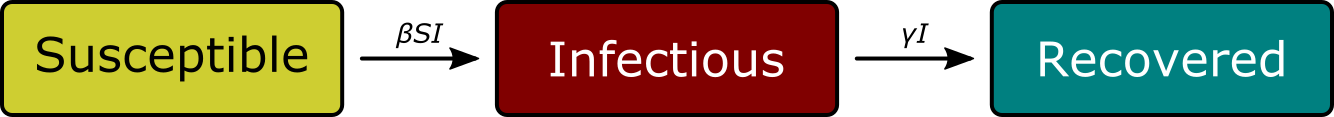

In [18]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/SIR_Flow_Diagram.png',width=800)
display(img)

From [this wikipedia page](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)

More precisely, the classic SIR model is expressed as

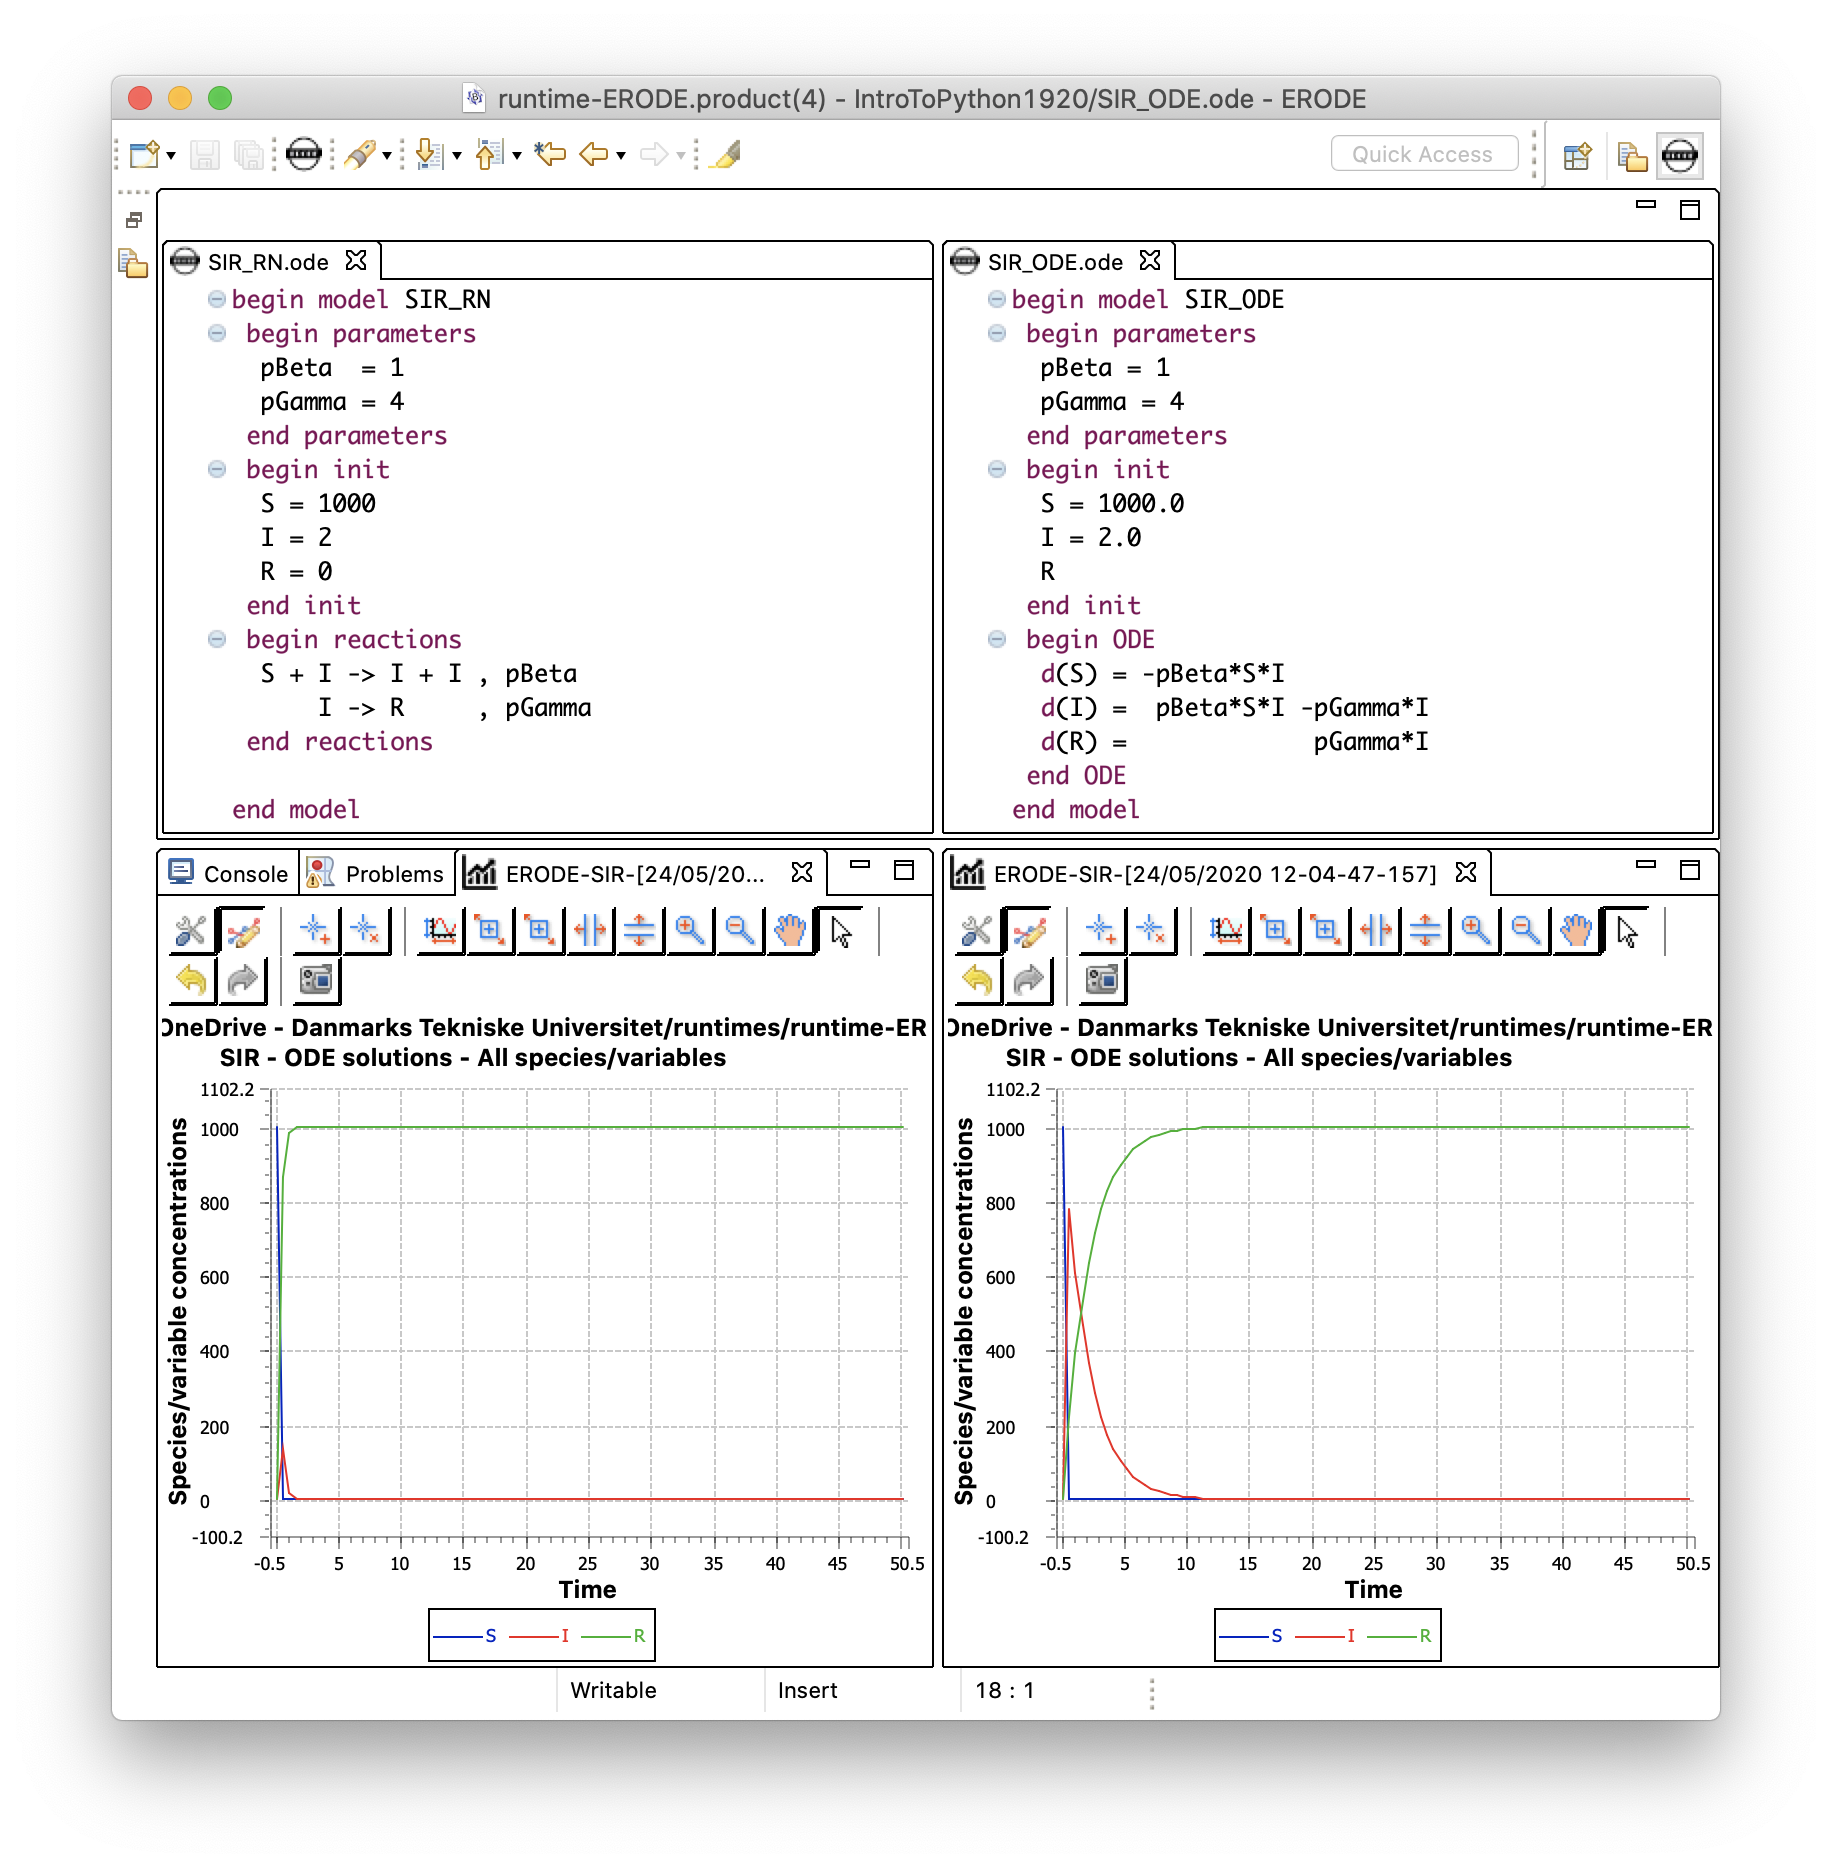

In [20]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/SIRerode.png',width=1200)
display(img)

This is a screenshot of my own tool __[ERODE](https://www.erode.eu/)__ able to analyse Reaction Networks and ODEs

In [21]:
from IPython.display import IFrame
IFrame("http://www.erode.eu/", 1000, 1000)

Now, it is known that R_0 is given by
* R_0 = $\frac{\text{beta}}{\text{gamma}}$

In ERODE we can play with these parameters and see what happens. 
The figure above shows the plots for
* Bottom-Left :  R_0=0.25 (beta=1,gamma=4)
* Bottom-Right: R_0=2.00 (beta=1,gamma=0.5)

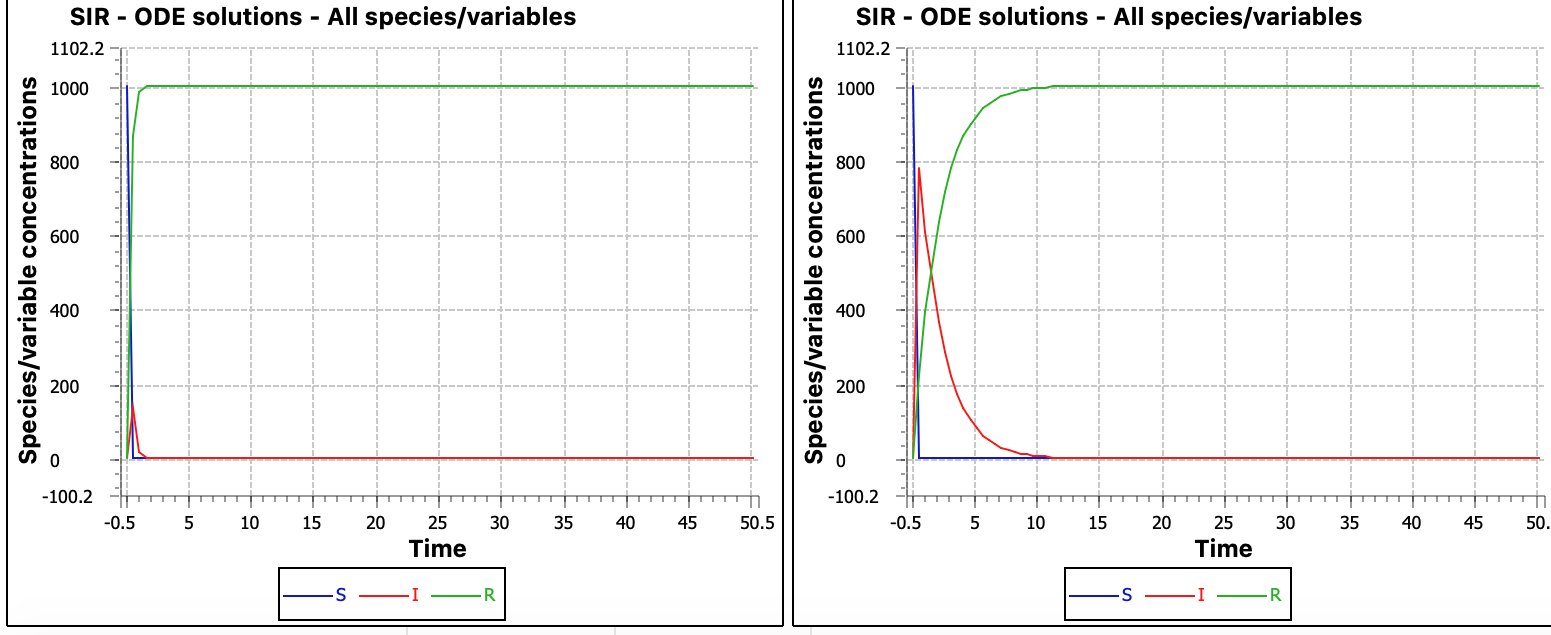

In [23]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/SIRerodeJustPlots2.png',width=900)
display(img)

In ERODE, we actually created plots for
* R_0=0.25 (beta=1,gamma=4)
* R_0=0.50 (beta=1,gamma=2)
* R_0=1.00 (beta=1,gamma=1)
* R_0=2.00 (beta=1,gamma=0.5)

## Let's do some plots using these data

In [79]:
#import sys
#!"{sys.executable}" -m pip install matplotlib
#import sys
#!"{sys.executable}" -m pip install csv
#
#%pip install matplotlib
#%pip install csv

In [27]:
import csv
import matplotlib.pyplot as plt

### We first replicate one of the plots generated by ERODE

Please download the CSV files available in the wiki page for slides, and store them in folder csv/SIR_ERODE
- Or find them [here](https://github.com/EMbeDS-education/StatsAndComputing20212022/tree/main/PDA/jupyter/jupyterNotebooks/csv/SIR_ERODE)

First I load the data for the case R_0 = 0.25

In [28]:
fileName='csv/SIR_ERODE/sirR0_0.25.cdat'

#I want to 'open' a csvfile to 'r'ead it
#  For the time being, ignore the with statement. 
#  Assume it does: csv = open(fileName, 'r')
#  I will tell you more on this in two classes from now
with open(fileName, 'r') as csvfile:
    #Intuitively, 
    #  `csv` allows us to read csv files row by row.
    #  `rows` is a list of rows in the file. 
    #   Each row is in turn a list of strings containing one entry per column
    rows = csv.reader(csvfile, delimiter=',')
    
    #We load the header of the file in the list `header`
    labels = next(rows,None)
    #print(labels)
    
    #We now iterate over all rows to load the data
    time = []
    S = []
    I = []    
    R = []
    #We put these lists in another list to simplify the for loop below
    loaded_data = [time,S,I,R]

    for row in rows :
        #print(row)
        for column in range(len(loaded_data)):
            data = row[column]
            datafloat = float(data)
            datafloatRound = round(datafloat,4)
            loaded_data[column].append(datafloatRound)
            #print(data,float(data))

#print(loaded_data)

Then I recreate ERODE's plot for the case R_0=0.25

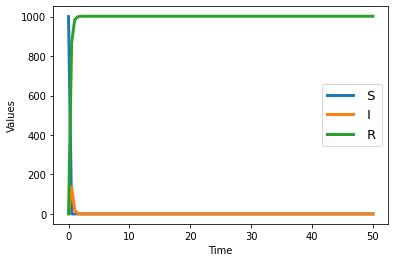

In [29]:
x = loaded_data[0]

for i in range(1,len(loaded_data)) :
    plt.plot(x,loaded_data[i], label=labels[i],linewidth=3)

plt.legend(fontsize=13)
plt.xlabel('Time')
plt.ylabel('Values')

#plt.savefig('SIR model',bbox_inches='tight')
plt.show()

## Let's create a plot where we compare how the Infected population evolves in the 4 scenarios

For doing this, we need to do more or less the same tasks done for the previous plot
* But this time we have to do it 4 times: one per different R_0 value
* __Let's use functions!__

In [85]:
def loadSIRCSV(file_name):
    #I want to 'open' a csvfile to 'r'ead it
    #  For the time being, ignore the with statement. 
    #  Assume it does: csv = open(fileName, 'r')
    #  I will tell you more on this in two classes from now
    with open(file_name, 'r') as csvfile:
        #Intuitively, 
        #  `csv` allows us to read csv files row by row.
        #  `rows` is a list of rows in the file. 
        #   Each row is in turn a list of strings containing one entry per column
        rows = csv.reader(csvfile, delimiter=',')

        #We load the header of the file in the list `header`
        labels = next(rows,None)
        #print(labels)

        #We now iterate over all rows to load the data
        time = []
        S = []
        I = []    
        R = []
        #We put these lists in another list to simplify the for loop below
        loaded_data = [time,S,I,R]

        for row in rows :
            #print(row)
            for column in range(len(loaded_data)):
                data = row[column]
                datafloat = float(data)
                datafloatRound = round(datafloat,4)
                loaded_data[column].append(datafloatRound)
                #print(data,float(data))
    return loaded_data

Thanks to this function, now it is very easy to load the four CSV files generated by ERODE

In [86]:
loaded_data0_25 = loadSIRCSV('csv/SIR_ERODE/sirR0_0.25.cdat')
loaded_data0_50 = loadSIRCSV('csv/SIR_ERODE/sirR0_0.50.cdat')
loaded_data1_00 = loadSIRCSV('csv/SIR_ERODE/sirR0_1.00.cdat')
loaded_data2_00 = loadSIRCSV('csv/SIR_ERODE/sirR0_2.00.cdat')

We now create 3 plots, each comparing:
* the susceptible population in the four configurations
* the infected population in the four configurations
* the recovered population in the four configurations

Of course, we are going to use a function to do this

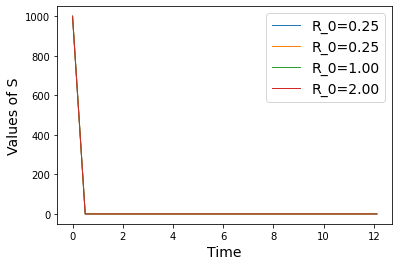

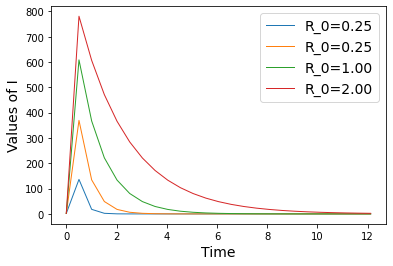

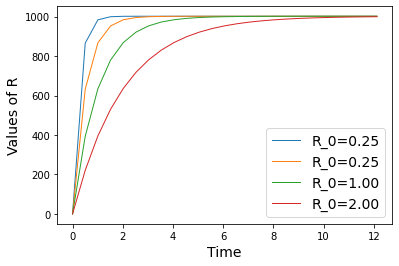

In [100]:
def plot_population(all_data,config_names,pop_id,pop_name):
    points=25
    for i in range(len(all_data)) :
        plt.plot(all_data[i][0][:points],all_data[i][pop_id][:points], label=config_names[i],linewidth=1)
    plt.legend(fontsize=14)
    plt.xlabel('Time',fontsize=14)
    plt.ylabel('Values of '+pop_name,fontsize=14)
    plt.show()

    
all_data = [loaded_data0_25,loaded_data0_50,loaded_data1_00,loaded_data2_00]
config_names = ['R_0=0.25','R_0=0.25','R_0=1.00','R_0=2.00']
plot_population(all_data,config_names,1,'S')
plot_population(all_data,config_names,2,'I')
plot_population(all_data,config_names,3,'R')
#print(type(all_data))
#print(len(all_data))

# An application the creation of word clouds for COVID-related online news

This topic is treated in a jupyter notebook available in the wiki page for slides and further material

# Lambda functions, map, filter and reduce

This final part of the notebook is a sort of _appendix_ presenting related notions.
- We leave it here for reference.
- We will see more on this in module 2!

## Lambda functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function consists only of one expression

This lambda function computes the sum of two numbers:

In [101]:
my_lfun = lambda a, b: a+b
my_lfun(1,2)

3

In [102]:
def expression_evaluator(f,n1,n2):
    print(f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)

3


A lambda function is really nothing more than a simple function without name
* Why should we use them then?

There are places where `def` cannot be used:
* In arguments of functions or in return statements

Lambda expression can help you avoiding annoying workarounds
* In the end, it is just syntactic sugar

In [103]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `True`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Notes:
* In the examples below 
  - we will define functions. But any Python function can be used, even built-in ones.
  - the functions take 1 parameter. If the considered functions have 2, 3, or more parameters, you just have to provide 2, 3, or more lists.

Some examples have been taken from the two following links, where interesting discussions on lambdas, map, filter, and reduce can be found:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

## Map

In [104]:
items = [1, 2, 3, 4, 5]

#Using a loop
squared = []
for i in items:
    squared.append(i**2)
print(squared)
    
#Can be expressed more compactly using maps
squared = list(map(lambda x: x**2, items))
print(squared)

#The same you can do, more efficiently, with list comprehensions
squared = [x**2 for x in items]
print(squared)

[1, 4, 9, 16, 25]
[1, 4, 9, 16, 25]
[1, 4, 9, 16, 25]


You can even have lists of functions rather than a list of values

In [105]:
def multiply(x):
    return (x*x)
def add(x):
    return (x+x)

funcs = [multiply, add]
for i in range(5):
    value = list(map(lambda x: x(i), funcs))
    print(value)

[0, 0]
[1, 2]
[4, 4]
[9, 6]
[16, 8]


Another example using a built-in function

In [ ]:
names = ['andrea','daniele']
capitalized_names = list(map(str.capitalize,names))
print(capitalized_names)

## Filter

In [108]:
items = [1, 2, 3, 4, 5]

#Using a loop
odd_numbers = []
for x in items:
    if x%2 !=0 :
        odd_numbers.append(x)
print(odd_numbers)

#Can be expressed more compactly using maps
odd_numbers = list(filter(lambda x: x%2 != 0, items))
print(odd_numbers)

#The same you can do with list comprehensions
odd_numbers = [x for x in items if x%2 !=0]
print(odd_numbers)

[1, 3, 5]
[1, 3, 5]
[1, 3, 5]


## Reduce

In [109]:
items = [1, 2, 3, 4, 5]

#Using a loop
tot_sum = 0
for x in items:
    tot_sum += x
print(tot_sum)

#Can be expressed more compactly using maps
from functools import reduce
tot_sum = reduce(lambda x, y: x + y, items)
print(tot_sum)

#The result is not a list but a number, therefore you can't use comprehensions

15
15


Reduce works as follow:
* Initially, `x` and `y` are the first and second element of the list, resp
* In every following step, `x` is cumulative value computed so far, while `y` is the next element in the list

Of course you can combine all map, filter and reduce

In [ ]:
items = [1, 2, 3, 4, 5]

squared = map(lambda x: x**2, items)
squared_smaller_than_ten = filter(lambda x: x<10, squared)
sum_of_squared_smaller_than_ten = reduce(lambda x, y: x + y, squared_smaller_than_ten)
print(sum_of_squared_smaller_than_ten)

#Can be expressed in one go
sum_of_squared_smaller_than_ten = reduce(lambda x, y: x + y,filter(lambda x: x < 10, map(lambda x: x**2, items)))
print(sum_of_squared_smaller_than_ten)

## A closing note on map, filter and reduce

* These are notions typical of so-called _functional programming languages_
  * Languages somehow close to the mathematical language/mathematical way of thinking, 
  * Everything is a function, and computation evolves by evaluating the correct functions
* They don't enrich the expressive power of Python
  * But they allow you to write more compact code avoiding loops and if.
* They became mainstream (supported e.g. in Java or .NET languages) about 5/10 years ago
  - or even Excel more recently

My personal opinion:
* These are advanced programming features that you might not need (and might not understand :D ) 
  - comprehensions should be enough for most of your problems
* Performance-wise, they are not so different.
* Nevertheless, you might encounter them when googling for a solution for a problem
* Therefore you should know them, while I suggest you to use comprehensions whenever possible